In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

In [2]:
train_raw = pd.read_csv('development_dataset.csv')

In [3]:
train_raw.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [4]:
col_names = [ 'ID','FICO','Business Revenue','TSR','Last 6M Avg Util','Income','Last 6M Avg Remit','Last 6M Avg Bal','Internal Revolve','Lending AR% in last 6M',
'ExternalBalance',
'Months in Business',
'preferred_spend_line',
'total_cards',
'preferred_bal_line',
'preavgremit1_3_all',
'External_rev_rate',
'Supplementary Cards',
'isChargeCust',
'CMV',
'Assigned Line']

In [5]:
train_raw.columns = col_names

In [6]:
print(train_raw.describe())

                 ID          FICO  Business Revenue           TSR  \
count  34000.000000  33039.000000      30615.000000  21506.000000   
mean   17000.500000    917.391603          1.119596    248.076201   
std     9815.098913     50.222389         12.714724    241.167723   
min        1.000000    730.588235          0.001333     18.928571   
25%     8500.750000    882.352941          0.083333     71.428571   
50%    17000.500000    924.705882          0.166667    142.857143   
75%    25500.250000    956.470588          0.555556    357.142857   
max    34000.000000   1000.000000       1000.000000   1000.000000   

       Last 6M Avg Util        Income  Last 6M Avg Remit  Last 6M Avg Bal  \
count      33999.000000  30505.000000       33165.000000     33165.000000   
mean         631.571391     15.290028           2.055295       200.007169   
std           30.863288     29.123815           8.960891        11.282223   
min          347.053355      0.005000           0.353228         0.000

In [7]:
train_raw.shape

(34000, 21)

In [8]:
train_raw.describe()

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
count,34000.000000,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000
mean,17000.500000,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950
std,9815.098913,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136
min,1.000000,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,8500.750000,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542
50%,17000.500000,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115
75%,25500.250000,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213
max,34000.000000,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000


In [9]:
# class distribution
print(train_raw.groupby('Assigned Line').size())

Assigned Line
High       3747
Low       12081
Medium    18172
dtype: int64


FICO                   AxesSubplot(0.125,0.536818;0.352273x0.343182)
Business Revenue    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
TSR                       AxesSubplot(0.125,0.125;0.352273x0.343182)
Last 6M Avg Util       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

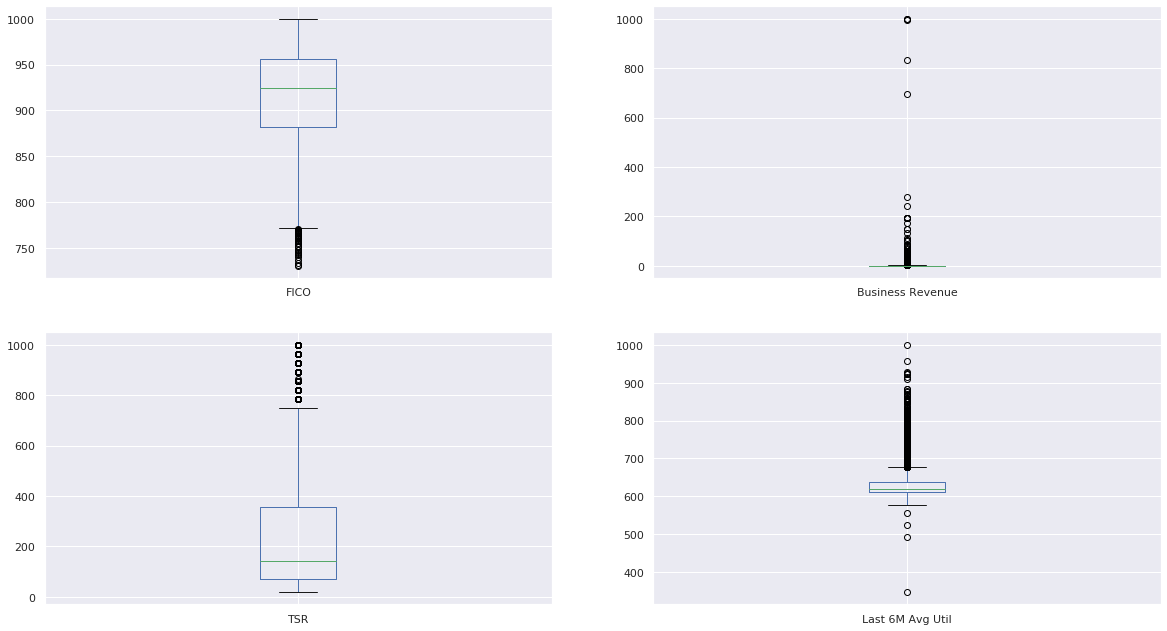

In [10]:
#Univariate Plots

sns.set(rc={'figure.figsize':(20,11)})

# box and whisker plots
train_raw[['FICO','Business Revenue','TSR','Last 6M Avg Util']].plot(kind='box', subplots=True,layout=(2,2), sharex=False, sharey=False)

Income                  AxesSubplot(0.125,0.536818;0.352273x0.343182)
Last 6M Avg Remit    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Last 6M Avg Bal            AxesSubplot(0.125,0.125;0.352273x0.343182)
Internal Revolve        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

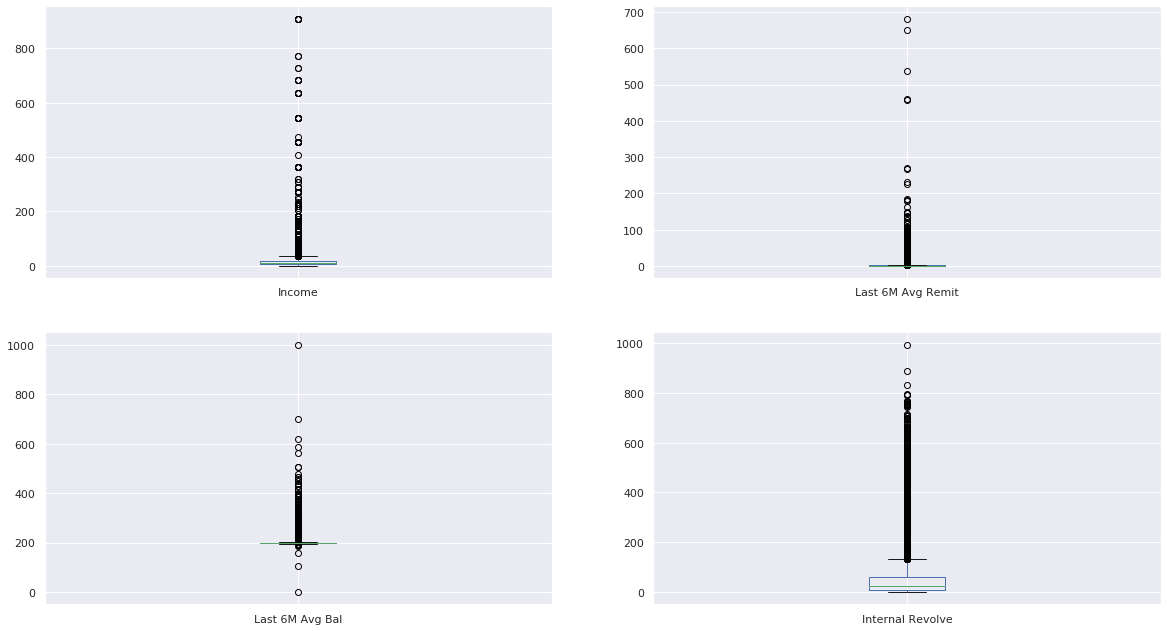

In [11]:
# box and whisker plots
train_raw[['Income','Last 6M Avg Remit','Last 6M Avg Bal','Internal Revolve']].plot(kind='box', subplots=True,layout=(2,2), sharex=False, sharey=False)

Lending AR% in last 6M       AxesSubplot(0.125,0.536818;0.352273x0.343182)
ExternalBalance           AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Months in Business              AxesSubplot(0.125,0.125;0.352273x0.343182)
preferred_spend_line         AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

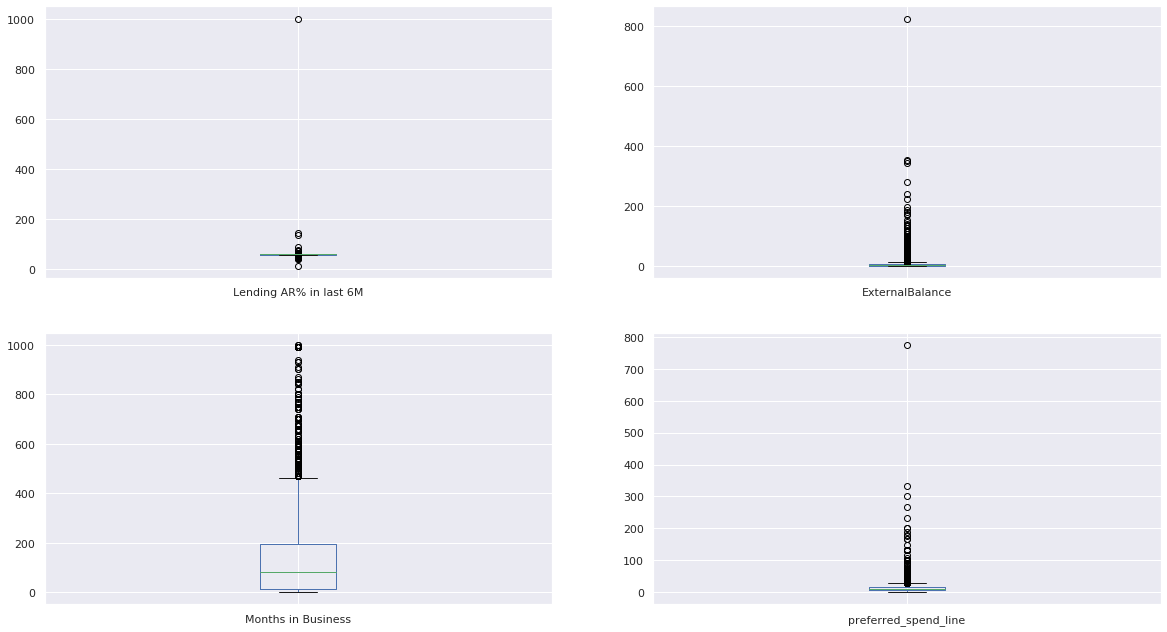

In [12]:
# box and whisker plots
train_raw[['Lending AR% in last 6M',
'ExternalBalance',
'Months in Business',
'preferred_spend_line']].plot(kind='box', subplots=True,layout=(2,2), sharex=False, sharey=False)

preferred_bal_line       AxesSubplot(0.125,0.536818;0.352273x0.343182)
preavgremit1_3_all    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
External_rev_rate           AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

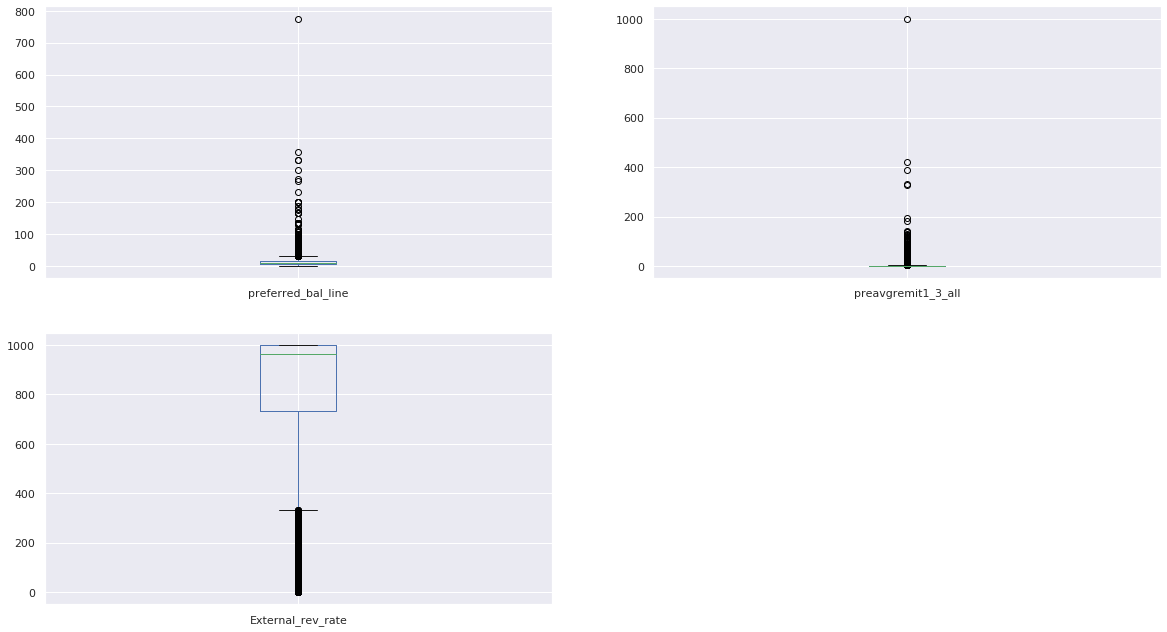

In [13]:
# box and whisker plots
train_raw[['total_cards',
'preferred_bal_line',
'preavgremit1_3_all',
'External_rev_rate']].plot(kind='box', subplots=True,layout=(2,2), sharex=False, sharey=False)

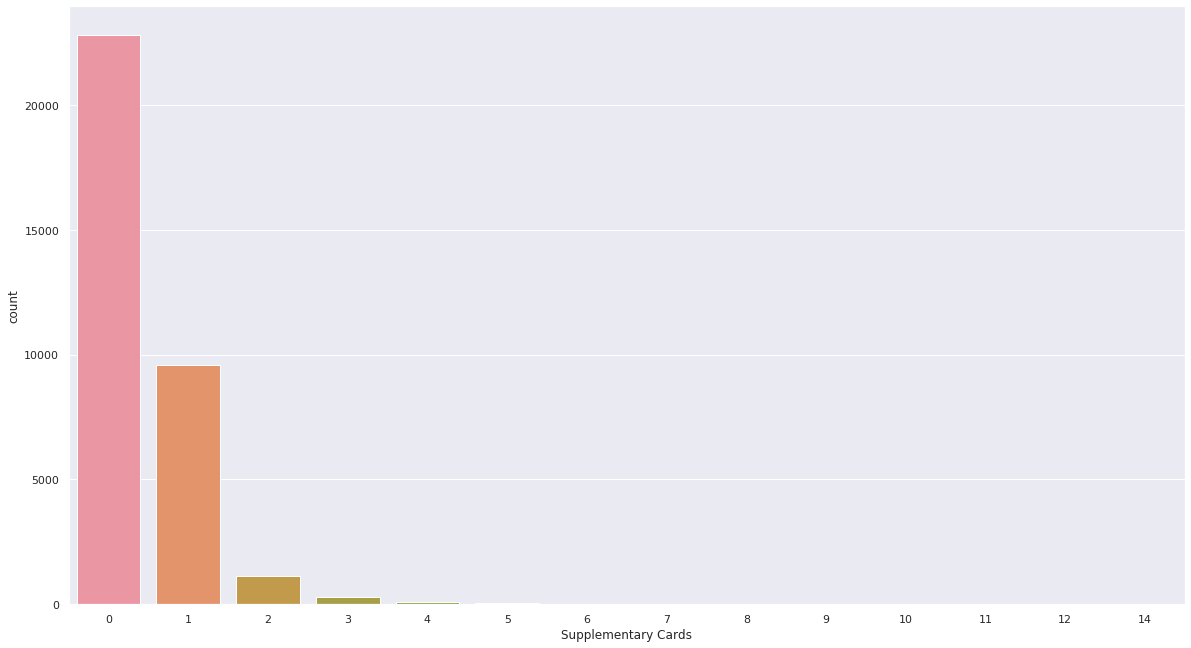

In [14]:
sns.countplot(train_raw['Supplementary Cards'])

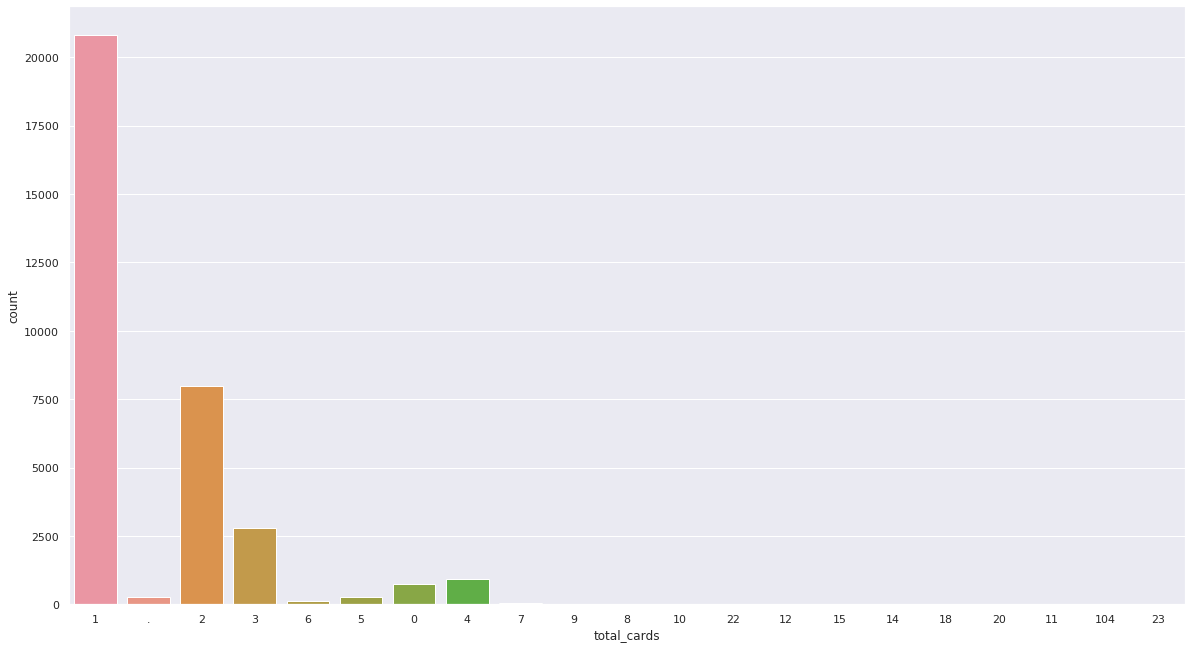

In [15]:
sns.countplot(train_raw['total_cards'])

In [16]:
train_raw.columns

Index(['ID', 'FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Internal Revolve',
       'Lending AR% in last 6M', 'ExternalBalance', 'Months in Business',
       'preferred_spend_line', 'total_cards', 'preferred_bal_line',
       'preavgremit1_3_all', 'External_rev_rate', 'Supplementary Cards',
       'isChargeCust', 'CMV', 'Assigned Line'],
      dtype='object')

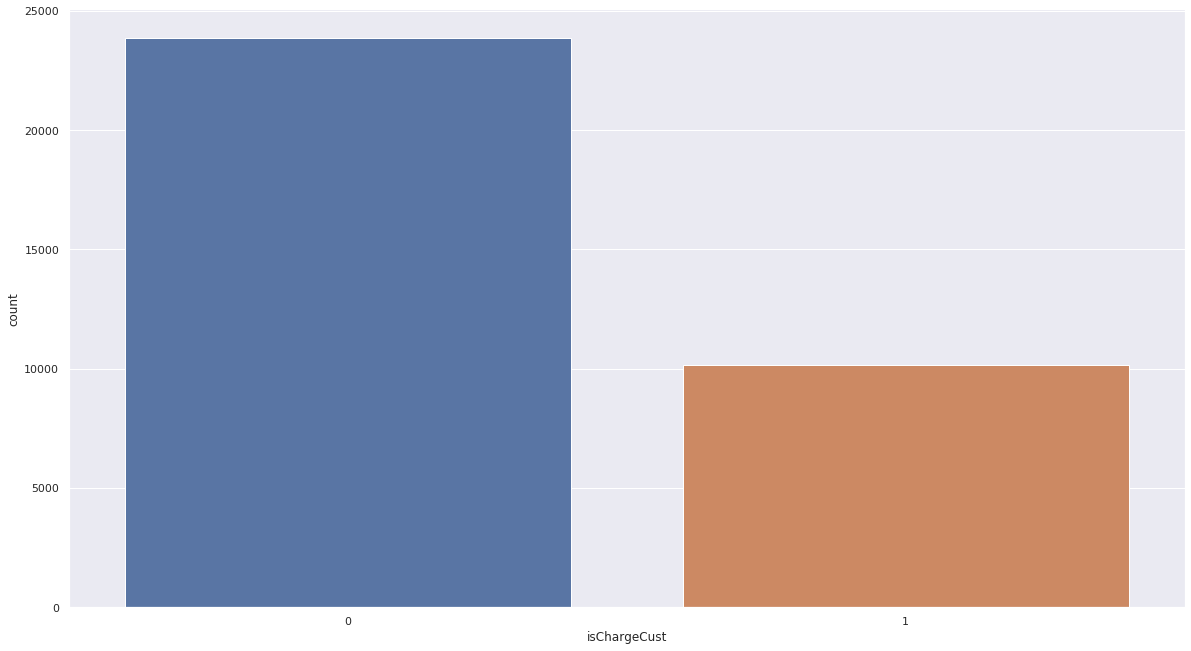

In [17]:
sns.countplot(train_raw['isChargeCust'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15d2bdba8>]],
      dtype=object)

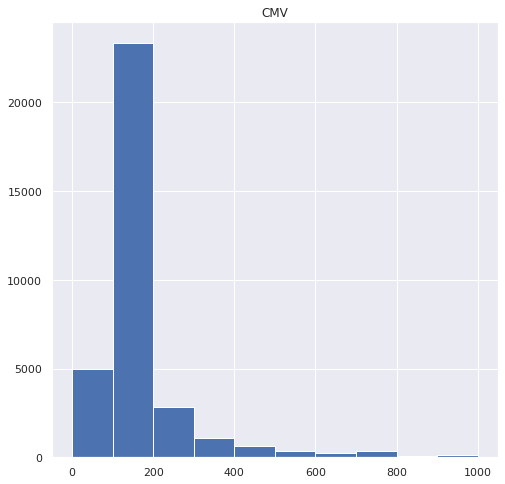

In [18]:
sns.set(rc={'figure.figsize':(8,8)})
train_raw[['CMV']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15d240908>,
      dtype=object)

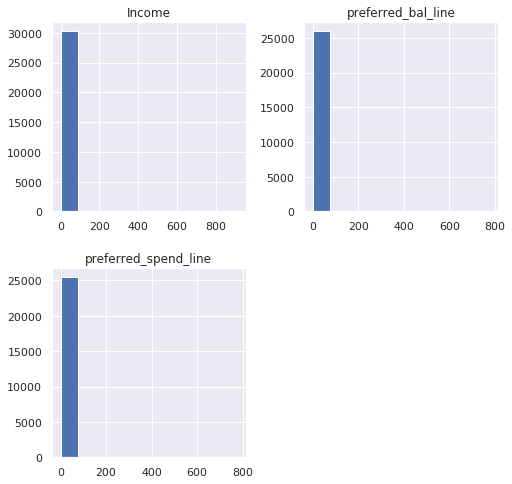

In [19]:
train_raw[['preferred_bal_line' ,'Income','preferred_spend_line']].hist()

In [20]:
train_1 = train_raw.dropna()

In [21]:
train_1.shape

(2059, 21)

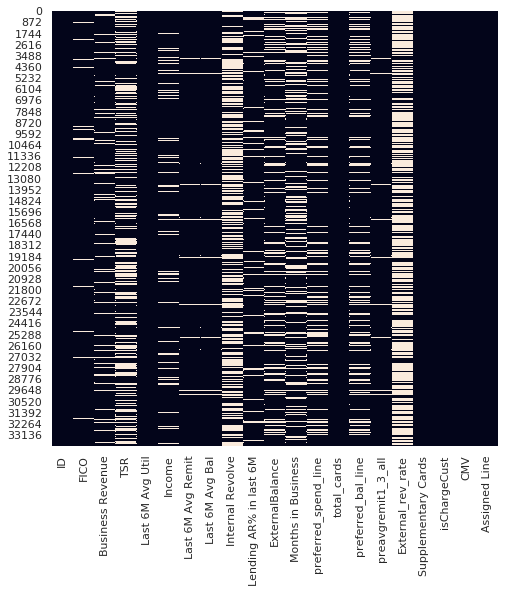

In [22]:
sns.heatmap(train_raw.isnull(), cbar=False)

In [23]:
#Removing TSR ,Internal Revolve , External_rev_rate
train_2 = train_raw.drop(['TSR','Internal Revolve','External_rev_rate','ID'], axis=1)

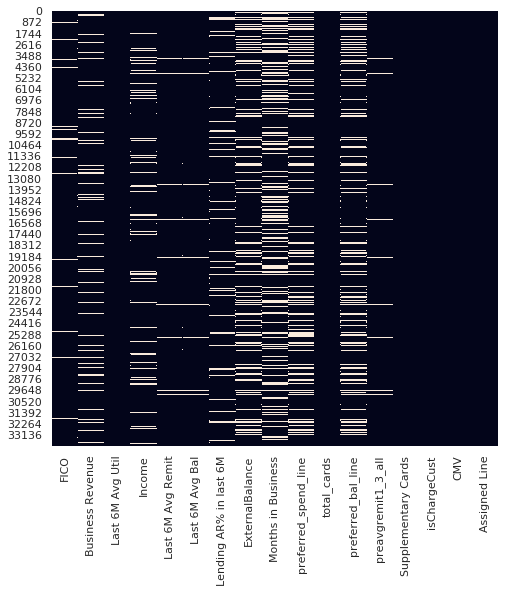

In [24]:
sns.heatmap(train_2.isnull(), cbar=False)

In [25]:
train_2.describe()

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV
count,33039.000000,30615.000000,33999.000000,30505.000000,33165.000000,33165.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,34000.000000,34000.000000,34000.000000
mean,917.391603,1.119596,631.571391,15.290028,2.055295,200.007169,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,0.400029,0.298059,161.355950
std,50.222389,12.714724,30.863288,29.123815,8.960891,11.282223,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,0.684850,0.457412,123.231136
min,730.588235,0.001333,347.053355,0.005000,0.353228,0.000000,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.000000,0.000000,0.000000
25%,882.352941,0.083333,611.691167,6.636364,0.691201,197.196716,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,0.000000,0.000000,104.385542
50%,924.705882,0.166667,619.802909,10.000000,0.998093,197.912501,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,0.000000,0.000000,117.493115
75%,956.470588,0.555556,637.450565,18.181818,1.735250,199.687427,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1.000000,1.000000,159.446213
max,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,14.000000,1.000000,1000.000000


In [26]:
train_raw.describe()

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
count,34000.000000,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000
mean,17000.500000,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950
std,9815.098913,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136
min,1.000000,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,8500.750000,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542
50%,17000.500000,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115
75%,25500.250000,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213
max,34000.000000,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000


In [27]:
import scipy
from sklearn.preprocessing import MinMaxScaler

In [28]:
train_2.head()

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,828.235294,0.138889,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,1,0,100.104991,Low
1,911.764706,0.027778,611.574748,8.181818,1.344479,198.600020,NaN,NaN,15.012510,NaN,1,NaN,1.614613,0,1,146.654045,High
2,962.352941,0.833333,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.0,1,10.0,1.044599,0,0,98.249570,Medium
3,892.941177,NaN,638.076431,9.090909,0.820218,197.355744,58.632548,NaN,NaN,NaN,1,NaN,1.145729,1,0,140.862306,Low
4,914.117647,0.083333,626.514988,5.181818,1.372928,198.790477,58.632548,NaN,210.175146,NaN,.,NaN,1.558341,1,0,101.268503,High


In [29]:
train_2_mean = train_2.fillna(train_2.mean())

In [30]:
train_2_mean.head()

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,828.235294,0.138889,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,1,0,100.104991,Low
1,911.764706,0.027778,611.574748,8.181818,1.344479,198.600020,56.497320,5.429062,15.012510,11.679589,1,12.453257,1.614613,0,1,146.654045,High
2,962.352941,0.833333,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,0,0,98.249570,Medium
3,892.941177,1.119596,638.076431,9.090909,0.820218,197.355744,58.632548,5.429062,117.283667,11.679589,1,12.453257,1.145729,1,0,140.862306,Low
4,914.117647,0.083333,626.514988,5.181818,1.372928,198.790477,58.632548,5.429062,210.175146,11.679589,.,12.453257,1.558341,1,0,101.268503,High


In [31]:
train_2_mean[train_2_mean['Assigned Line'] == 'Low']['Assigned Line'] = 1
train_2_mean[train_2_mean['Assigned Line'] == 'High']['Assigned Line'] = 3
train_2_mean[train_2_mean['Assigned Line'] == 'Medium']['Assigned Line'] = 2

/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [32]:
train_2_mean.head()

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,828.235294,0.138889,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,1,0,100.104991,Low
1,911.764706,0.027778,611.574748,8.181818,1.344479,198.600020,56.497320,5.429062,15.012510,11.679589,1,12.453257,1.614613,0,1,146.654045,High
2,962.352941,0.833333,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,0,0,98.249570,Medium
3,892.941177,1.119596,638.076431,9.090909,0.820218,197.355744,58.632548,5.429062,117.283667,11.679589,1,12.453257,1.145729,1,0,140.862306,Low
4,914.117647,0.083333,626.514988,5.181818,1.372928,198.790477,58.632548,5.429062,210.175146,11.679589,.,12.453257,1.558341,1,0,101.268503,High


In [33]:
train_2_mean[train_2_mean['total_cards']=='.'] = 1

In [102]:
for i in range(len(train_2_mean['Assigned Line'])):
    if(train_2_mean['Assigned Line'][i] == 'Low'):
        train_2_mean['Assigned Line'][i]= int(0)
    if(train_2_mean['Assigned Line'][i]=='Medium'):
        train_2_mean['Assigned Line'][i]= int(1)
    if(train_2_mean['Assigned Line'][i]== 'High'):
        train_2_mean['Assigned Line'][i]= int(2)
    

/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

In [103]:
train_2_mean

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,828.235294,0.138889,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,1,0,100.104991,0
1,911.764706,0.027778,611.574748,8.181818,1.344479,198.600020,56.497320,5.429062,15.012510,11.679589,1,12.453257,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,0,0,98.249570,1
3,892.941177,1.119596,638.076431,9.090909,0.820218,197.355744,58.632548,5.429062,117.283667,11.679589,1,12.453257,1.145729,1,0,140.862306,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,1,1,1.000000,1
5,794.117647,0.117700,624.065797,12.727273,0.665458,197.251700,58.632548,0.139290,117.283667,2.000000,1,2.000000,1.037051,0,0,379.736661,0
6,987.058823,1.119596,611.574748,15.290028,0.970320,197.831747,56.497320,3.446909,117.283667,11.679589,1,6.000000,1.161463,0,1,146.382100,0
7,921.176471,0.138889,612.660165,18.181818,0.585291,196.956773,58.632548,0.905039,80.066722,5.133333,1,5.133333,0.975338,1,0,103.776248,1
8,947.058823,1.119596,648.330121,23.636364,0.782048,200.301604,58.632548,2.886284,20.016681,9.733333,1,11.000000,1.141355,1,0,96.337349,0
9,940.000000,0.137778,611.574748,9.090909,0.559710,196.911295,47.899686,4.302053,117.283667,9.200000,1,9.200000,0.959315,1,0,113.433735,1


In [104]:

train_2_mean.astype({'Assigned Line': 'int64'}).dtypes


FICO                      float64
Business Revenue          float64
Last 6M Avg Util          float64
Income                    float64
Last 6M Avg Remit         float64
Last 6M Avg Bal           float64
Lending AR% in last 6M    float64
ExternalBalance           float64
Months in Business        float64
preferred_spend_line      float64
total_cards                object
preferred_bal_line        float64
preavgremit1_3_all        float64
Supplementary Cards         int64
isChargeCust                int64
CMV                       float64
Assigned Line               int64
dtype: object

In [105]:
train_2_mean = train_2_mean.astype({'total_cards' : 'int64' , 'Assigned Line': 'int64' })

In [106]:
train_2_mean.dtypes

FICO                      float64
Business Revenue          float64
Last 6M Avg Util          float64
Income                    float64
Last 6M Avg Remit         float64
Last 6M Avg Bal           float64
Lending AR% in last 6M    float64
ExternalBalance           float64
Months in Business        float64
preferred_spend_line      float64
total_cards                 int64
preferred_bal_line        float64
preavgremit1_3_all        float64
Supplementary Cards         int64
isChargeCust                int64
CMV                       float64
Assigned Line               int64
dtype: object

In [107]:
train_2_mean

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,828.235294,0.138889,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,1,0,100.104991,0
1,911.764706,0.027778,611.574748,8.181818,1.344479,198.600020,56.497320,5.429062,15.012510,11.679589,1,12.453257,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,0,0,98.249570,1
3,892.941177,1.119596,638.076431,9.090909,0.820218,197.355744,58.632548,5.429062,117.283667,11.679589,1,12.453257,1.145729,1,0,140.862306,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,1,1,1.000000,1
5,794.117647,0.117700,624.065797,12.727273,0.665458,197.251700,58.632548,0.139290,117.283667,2.000000,1,2.000000,1.037051,0,0,379.736661,0
6,987.058823,1.119596,611.574748,15.290028,0.970320,197.831747,56.497320,3.446909,117.283667,11.679589,1,6.000000,1.161463,0,1,146.382100,0
7,921.176471,0.138889,612.660165,18.181818,0.585291,196.956773,58.632548,0.905039,80.066722,5.133333,1,5.133333,0.975338,1,0,103.776248,1
8,947.058823,1.119596,648.330121,23.636364,0.782048,200.301604,58.632548,2.886284,20.016681,9.733333,1,11.000000,1.141355,1,0,96.337349,0
9,940.000000,0.137778,611.574748,9.090909,0.559710,196.911295,47.899686,4.302053,117.283667,9.200000,1,9.200000,0.959315,1,0,113.433735,1


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [109]:
cols_x = ['FICO', 'Business Revenue', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Lending AR% in last 6M',
       'ExternalBalance', 'Months in Business', 'preferred_spend_line',
       'total_cards', 'preferred_bal_line', 'preavgremit1_3_all',
       'Supplementary Cards', 'isChargeCust', 'CMV']
cols_y = ['Assigned Line']

In [110]:
#train test split

train_x, test_x, train_y, test_y = train_test_split(train_2_mean[cols_x], train_2_mean[cols_y],
                                                        train_size=0.7,random_state=1)

In [111]:
clf = RandomForestClassifier()

In [112]:
clf.fit(train_x, train_y)

/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
predictions = clf.predict(test_x)

In [114]:
# Train and Test Accuracy
print("Train Accuracy :: ", accuracy_score(train_y, clf.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))


Train Accuracy ::  0.9845798319327731
Test Accuracy  ::  0.5264705882352941


In [115]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [116]:
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

NameError: name 'feat_labels' is not defined

In [117]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [118]:
sfm = SelectFromModel(clf)
sfm.fit(train_x, train_y)

/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
   

In [119]:
for feature_list_index in clf.get_support(indices=True):
    print(feat_labels[feature_list_index])

AttributeError: 'RandomForestClassifier' object has no attribute 'get_support'

In [120]:
!install xgboost

install: missing destination file operand after 'xgboost'
Try 'install --help' for more information.


In [121]:
import xgboost as xgb

In [122]:
train_2_mean

,FICO,Business Revenue,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,828.235294,0.138889,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,1,0,100.104991,0
1,911.764706,0.027778,611.574748,8.181818,1.344479,198.600020,56.497320,5.429062,15.012510,11.679589,1,12.453257,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,0,0,98.249570,1
3,892.941177,1.119596,638.076431,9.090909,0.820218,197.355744,58.632548,5.429062,117.283667,11.679589,1,12.453257,1.145729,1,0,140.862306,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,1,1,1.000000,1
5,794.117647,0.117700,624.065797,12.727273,0.665458,197.251700,58.632548,0.139290,117.283667,2.000000,1,2.000000,1.037051,0,0,379.736661,0
6,987.058823,1.119596,611.574748,15.290028,0.970320,197.831747,56.497320,3.446909,117.283667,11.679589,1,6.000000,1.161463,0,1,146.382100,0
7,921.176471,0.138889,612.660165,18.181818,0.585291,196.956773,58.632548,0.905039,80.066722,5.133333,1,5.133333,0.975338,1,0,103.776248,1
8,947.058823,1.119596,648.330121,23.636364,0.782048,200.301604,58.632548,2.886284,20.016681,9.733333,1,11.000000,1.141355,1,0,96.337349,0
9,940.000000,0.137778,611.574748,9.090909,0.559710,196.911295,47.899686,4.302053,117.283667,9.200000,1,9.200000,0.959315,1,0,113.433735,1


In [123]:
cols_x = ['FICO', 'Business Revenue', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Lending AR% in last 6M',
       'ExternalBalance', 'Months in Business', 'preferred_spend_line',
       'total_cards', 'preferred_bal_line', 'preavgremit1_3_all',
       'Supplementary Cards', 'isChargeCust', 'CMV']
cols_y = ['Assigned Line']

In [124]:

train_x, test_x, train_y, test_y = train_test_split(train_2_mean[cols_x], train_2_mean[cols_y],
                                                        train_size=0.7,random_state=1)

In [125]:
model = xgb.XGBClassifier()
model.fit(train_x, train_y)

/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jakher/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [126]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [127]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]

In [128]:
accuracy = accuracy_score(test_y, predictions)

In [129]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.08%


In [130]:
print("Train Accuracy :: ", accuracy_score(train_y, model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))


Train Accuracy ::  0.5919747899159664
Test Accuracy  ::  0.5707843137254902
